# Exploration of US Stock Market and Recession Prediction of US Economy

This project addresses the growing concerns about a potential recession in the U.S. economy, a topic that has garnered significant attention in recent times. Analysts as well as the general public are worried about economic downturns due to various macroeconomic factors, including inflationary pressures, rising interest rates, and uncertainty in the global market. 

This project uses key economic indicators—such as the yield curve spread, GDP growth, unemployment rate, and CPI—to estimate the probability of a recession. 

The yield curve, particularly the difference between long-term and short-term interest rates (10-year minus 3-month U.S. Treasury rates), has historically been a strong predictor of economic downturns. Through the use of a Probit regression model, the project provides insights into the likelihood of an upcoming recession, helping both analysts and decision-makers anticipate and prepare for potential economic shifts.








## Data Preparation

### Fetching data from FRED API

In [51]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# FRED API FROM (https://research.stlouisfed.org/docs/api/api_key.html )
api_key = '33ecfd61a4f74d2a07a55f942ba4b6fb'  
fred = Fred(api_key=api_key)

In [52]:
personal_disposable_income = fred.get_series('DSPIC96')
nonfarm_payroll = fred.get_series('PAYNSA')
unemployment_rate = fred.get_series('UNRATE')
participation_rate = fred.get_series('CIVPART')
cpi = fred.get_series('CPIAUCSL')
yield_spread = fred.get_series('T10Y3M')  
gdp_growth = fred.get_series('A191RL1Q225SBEA')
gdp = fred.get_series('gdp') 
recession_dates = fred.get_series('USREC')


### Conversion from series to DataFrame for easy manipulation
because the data is in a form of a 1-dimensional array (or series), we will change it to a more typical DataFrame format.

In [53]:
personal_disposable_income_df = personal_disposable_income.to_frame(name='disposable_income')
print(personal_disposable_income_df.head()) 
print(personal_disposable_income_df.shape)  

nonfarm_payroll_df = nonfarm_payroll.to_frame(name='nonfarm_payroll')
print(nonfarm_payroll_df.head()) 
print(nonfarm_payroll_df.shape)  

unemployment_rate_df = unemployment_rate.to_frame(name='unemployment_rate')
print(unemployment_rate_df.head()) 
print(unemployment_rate_df.shape) 

participation_rate_df = participation_rate.to_frame(name='participation_rate')
print(participation_rate_df.head()) 
print(participation_rate_df.shape) 

cpi_df = cpi.to_frame(name='cpi')
print(cpi_df.head()) 
print(cpi_df.shape) 

yield_spread_df = yield_spread.to_frame(name='yield_spread')
print(yield_spread_df.head()) 
print(yield_spread_df.shape) 

gdp_growth_df = gdp_growth.to_frame(name='gdp_growth')
print(gdp_growth_df.head()) 
print(gdp_growth_df.shape) 

gdp_df = gdp.to_frame(name='gdp')
print(gdp_df.head()) 
print(gdp_df.shape) 

recession_dates_df = recession_dates.to_frame(name='recession')
print(recession_dates_df.head()) 
print(recession_dates_df.shape) 

            disposable_income
1959-01-01             2318.4
1959-02-01             2325.4
1959-03-01             2338.7
1959-04-01             2353.8
1959-05-01             2366.6
(788, 1)
            nonfarm_payroll
1939-01-01          29296.0
1939-02-01          29394.0
1939-03-01          29804.0
1939-04-01          29786.0
1939-05-01          30145.0
(1029, 1)
            unemployment_rate
1948-01-01                3.4
1948-02-01                3.8
1948-03-01                4.0
1948-04-01                3.9
1948-05-01                3.5
(921, 1)
            participation_rate
1948-01-01                58.6
1948-02-01                58.9
1948-03-01                58.5
1948-04-01                59.0
1948-05-01                58.3
(921, 1)
              cpi
1947-01-01  21.48
1947-02-01  21.62
1947-03-01  22.00
1947-04-01  22.00
1947-05-01  21.95
(933, 1)
            yield_spread
1982-01-04          2.32
1982-01-05          2.24
1982-01-06          2.43
1982-01-07          2.46
1982-01

In [54]:
personal_disposable_income_df = personal_disposable_income_df.reset_index()
personal_disposable_income_df.rename(columns={'index': 'date'}, inplace=True)
print(personal_disposable_income_df.shape)  

nonfarm_payroll_df = nonfarm_payroll_df.reset_index()
nonfarm_payroll_df.rename(columns={'index': 'date'}, inplace=True)
print(nonfarm_payroll_df.shape)

unemployment_rate_df = unemployment_rate_df.reset_index()
unemployment_rate_df.rename(columns={'index': 'date'}, inplace=True)
print(unemployment_rate_df.shape)

participation_rate_df = participation_rate_df.reset_index()
participation_rate_df.rename(columns={'index': 'date'}, inplace=True)
print(participation_rate_df.shape)

cpi_df = cpi_df.reset_index()
cpi_df.rename(columns={'index': 'date'}, inplace=True)
print(cpi_df.shape)

yield_spread_df = yield_spread_df.reset_index()
yield_spread_df.rename(columns={'index': 'date'}, inplace=True)
print(yield_spread_df.shape)

gdp_growth_df = gdp_growth_df.reset_index()
gdp_growth_df.rename(columns={'index': 'date'}, inplace=True)
print(gdp_growth_df.shape)

gdp_df = gdp_df.reset_index()
gdp_df.rename(columns={'index': 'date'}, inplace=True)
print(gdp_df.shape)

recession_dates_df = recession_dates_df.reset_index()
recession_dates_df.rename(columns={'index': 'date'}, inplace=True)
print(recession_dates_df)

(788, 2)
(1029, 2)
(921, 2)
(921, 2)
(933, 2)
(11159, 2)
(309, 2)
(314, 2)
           date  recession
0    1854-12-01        1.0
1    1855-01-01        0.0
2    1855-02-01        0.0
3    1855-03-01        0.0
4    1855-04-01        0.0
...         ...        ...
2033 2024-05-01        0.0
2034 2024-06-01        0.0
2035 2024-07-01        0.0
2036 2024-08-01        0.0
2037 2024-09-01        0.0

[2038 rows x 2 columns]


### Basic Data inspection

In [55]:
print(personal_disposable_income_df.info())
print(nonfarm_payroll_df.info())
print(unemployment_rate_df.info())
print(participation_rate_df.info())
print(cpi_df.info())
print(yield_spread_df.info())
print(gdp_growth_df.info())
print(gdp_df.info())
print(recession_dates_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               788 non-null    datetime64[ns]
 1   disposable_income  788 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1029 non-null   datetime64[ns]
 1   nonfarm_payroll  1029 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date     

In [56]:
print(personal_disposable_income_df.describe(include='all'))
print(nonfarm_payroll_df.describe(include='all'))
print(unemployment_rate_df.describe(include='all'))
print(participation_rate_df.describe(include='all'))
print(cpi_df.describe(include='all'))
print(yield_spread_df.describe(include='all'))
print(gdp_growth_df.describe(include='all'))
print(gdp_df.describe(include='all'))

                                date  disposable_income
count                            788         788.000000
mean   1991-10-16 13:53:17.969543168        8377.892893
min              1959-01-01 00:00:00        2318.400000
25%              1975-05-24 06:00:00        4561.600000
50%              1991-10-16 12:00:00        7333.200000
75%              2008-03-08 18:00:00       12138.275000
max              2024-08-01 00:00:00       20445.800000
std                              NaN        4406.337654
                                date  nonfarm_payroll
count                           1029      1029.000000
mean   1981-10-31 07:11:01.224489792     92455.411079
min              1939-01-01 00:00:00     29296.000000
25%              1960-06-01 00:00:00     54038.000000
50%              1981-11-01 00:00:00     90616.000000
75%              2003-04-01 00:00:00    131221.000000
max              2024-09-01 00:00:00    159341.000000
std                              NaN     38155.487680
          

### Data Cleaning: Checking null values

In [57]:
print(personal_disposable_income_df.isnull().sum())
print(nonfarm_payroll_df.isnull().sum())
print(unemployment_rate_df.isnull().sum())
print(participation_rate_df.isnull().sum())
print(cpi_df.isnull().sum())
print(yield_spread_df.isnull().sum())
print(gdp_growth_df.isnull().sum())
print(gdp_df.isnull().sum())
print(recession_dates_df.isnull().sum())

date                 0
disposable_income    0
dtype: int64
date               0
nonfarm_payroll    0
dtype: int64
date                 0
unemployment_rate    0
dtype: int64
date                  0
participation_rate    0
dtype: int64
date    0
cpi     0
dtype: int64
date              0
yield_spread    461
dtype: int64
date          0
gdp_growth    0
dtype: int64
date    0
gdp     4
dtype: int64
date         0
recession    0
dtype: int64


It is found out that the yield spread has 461 nulls, accounting for 4% of total data, lets take a look at the null values. 

In [58]:
null_yield_spread = yield_spread_df[yield_spread_df.isnull().any(axis=1)]

We have checked that all of the dates with NaNs coincide with non-trading days.(either U.S. holidays or a day the market was closed for observance).Therefore, it is safe to assume that the NaN values are due to market closures on these days, therefore these rows are dropped without affecting the analysis.

In [59]:
yield_spread_df = yield_spread_df.dropna()

There are 4 nulls in gdp, lets clean it as well

In [60]:
gdp_df = gdp_df.dropna()

In [61]:
nonfarm_payroll_df

,date,nonfarm_payroll
0,1939-01-01,29296.0
1,1939-02-01,29394.0
2,1939-03-01,29804.0
3,1939-04-01,29786.0
4,1939-05-01,30145.0
...,...,...
1024,2024-05-01,158842.0
1025,2024-06-01,159341.0
1026,2024-07-01,158399.0
1027,2024-08-01,158717.0


In [62]:
# For Nonfarm Payroll DataFrame
print("Nonfarm Payroll:")
print(f"Start Date: {nonfarm_payroll_df['date'].min()}")
print(f"End Date: {nonfarm_payroll_df['date'].max()}")

# For Yield Spread DataFrame
print("Yield Spread:")
print(f"Start Date: {yield_spread_df['date'].min()}")
print(f"End Date: {yield_spread_df['date'].max()}")

# For GDP Growth DataFrame
print("GDP Growth:")
print(f"Start Date: {gdp_growth_df['date'].min()}")
print(f"End Date: {gdp_growth_df['date'].max()}")

# For GDP DataFrame
print("GDP:")
print(f"Start Date: {gdp_growth_df['date'].min()}")
print(f"End Date: {gdp_growth_df['date'].max()}")

# For Unemployment Rate DataFrame
print("Unemployment Rate:")
print(f"Start Date: {unemployment_rate_df['date'].min()}")
print(f"End Date: {unemployment_rate_df['date'].max()}")

# For CPI DataFrame
print("CPI:")
print(f"Start Date: {cpi_df['date'].min()}")
print(f"End Date: {cpi_df['date'].max()}")

# For recession date DataFrame
print("Recession date:")
print(f"Start Date: {cpi_df['date'].min()}")
print(f"End Date: {cpi_df['date'].max()}")

Nonfarm Payroll:
Start Date: 1939-01-01 00:00:00
End Date: 2024-09-01 00:00:00
Yield Spread:
Start Date: 1982-01-04 00:00:00
End Date: 2024-10-10 00:00:00
GDP Growth:
Start Date: 1947-04-01 00:00:00
End Date: 2024-04-01 00:00:00
GDP:
Start Date: 1947-04-01 00:00:00
End Date: 2024-04-01 00:00:00
Unemployment Rate:
Start Date: 1948-01-01 00:00:00
End Date: 2024-09-01 00:00:00
CPI:
Start Date: 1947-01-01 00:00:00
End Date: 2024-09-01 00:00:00
Recession date:
Start Date: 1947-01-01 00:00:00
End Date: 2024-09-01 00:00:00


In [63]:
# Define the cutoff date
cutoff_date = pd.to_datetime('1982-01-01')

# Filter gdp DataFrame
gdp_df = gdp_df[gdp_df['date'] >= cutoff_date]

# Filter Nonfarm Payroll DataFrame
nonfarm_payroll_df = nonfarm_payroll_df[nonfarm_payroll_df['date'] >= cutoff_date]

# Filter Yield Spread DataFrame
yield_spread_df = yield_spread_df[yield_spread_df['date'] >= cutoff_date]

# Filter GDP Growth DataFrame
gdp_growth_df = gdp_growth_df[gdp_growth_df['date'] >= cutoff_date]

# Filter Unemployment Rate DataFrame
unemployment_rate_df = unemployment_rate_df[unemployment_rate_df['date'] >= cutoff_date]

# Filter CPI DataFrame
cpi_df = cpi_df[cpi_df['date'] >= cutoff_date]

# Filter Recession Date DataFrame
recession_dates_df = recession_dates_df[recession_dates_df['date'] >= cutoff_date]

# Filter Participation Rate DataFrame
participation_rate_df = participation_rate_df[participation_rate_df['date'] >= cutoff_date]

# Filter personal disposible income DataFrame
personal_disposable_income_df = personal_disposable_income_df[personal_disposable_income_df['date'] >= cutoff_date]

In [64]:
personal_disposable_income

1959-01-01     2318.4
1959-02-01     2325.4
1959-03-01     2338.7
1959-04-01     2353.8
1959-05-01     2366.6
               ...   
2024-04-01    17501.0
2024-05-01    17572.2
2024-06-01    17589.5
2024-07-01    17602.3
2024-08-01    17614.0
Length: 788, dtype: float64

### Data resampling to monthly frequency

In [65]:
# nonfarm (monthly)
# yield spread (daily)
# GDP growth (quarterly)
# unemployment rate (monthly)
# cpi (monthly)
# recession (monthly)
# participation rate (monthly)
# personal disposable income (monthly)
# Ensure all date columns are in datetime format
nonfarm_payroll_df['date'] = pd.to_datetime(nonfarm_payroll_df['date'])
yield_spread_df['date'] = pd.to_datetime(yield_spread_df['date'])
gdp_growth_df['date'] = pd.to_datetime(gdp_growth_df['date'])
unemployment_rate_df['date'] = pd.to_datetime(unemployment_rate_df['date'])
cpi_df['date'] = pd.to_datetime(cpi_df['date'])
recession_dates_df['date'] = pd.to_datetime(recession_dates_df['date'])
participation_rate_df['date'] = pd.to_datetime(participation_rate_df['date'])
personal_disposable_income_df['date'] = pd.to_datetime(personal_disposable_income_df['date'])


# Set the date column as the index for each dataframe
nonfarm_payroll_df.set_index('date', inplace=True)
yield_spread_df.set_index('date', inplace=True)
gdp_growth_df.set_index('date', inplace=True)
unemployment_rate_df.set_index('date', inplace=True)
cpi_df.set_index('date', inplace=True)
recession_dates_df.set_index('date', inplace=True)
participation_rate_df.set_index('date', inplace=True)
personal_disposable_income_df.set_index('date', inplace=True)

# nonfarm (monthly)
# yield spread (daily)
# GDP growth (quarterly)
# unemployment rate (monthly)
# cpi (monthly)
# recession (monthly)
# participation rate (monthly)
# personal disposable income (monthly)

# Now resample everything to the first day of the month or last day of the month
df_nonfarm_monthly = nonfarm_payroll_df.resample('M').last()  # Use .first() or .last() to align based on month-end
df_unemployment_rate_monthly = unemployment_rate_df.resample('M').last()
df_cpi_monthly = cpi_df.resample('M').last()
df_recession_monthly = recession_dates_df.resample('M').last()
df_participation_rate_monthly = participation_rate_df.resample('M').last()
df_disposable_income_monthly = personal_disposable_income_df.resample('M').last()

df_yield_spread_monthly = yield_spread_df.resample('M').mean()  # Daily data resampled to monthly (using mean)
df_gdp_growth_monthly = gdp_growth_df.resample('M').ffill()  # Quarterly data forward-filled to monthly



# Now merge all the dataframes on the resampled 'date' column (which is aligned to month-end)
combined_df = df_nonfarm_monthly.join([df_yield_spread_monthly, df_gdp_growth_monthly, 
                                       df_unemployment_rate_monthly, df_cpi_monthly, 
                                       df_recession_monthly, df_participation_rate_monthly, 
                                       df_disposable_income_monthly], how='outer')

# Fill forward any remaining missing values if appropriate
combined_df.fillna(method='ffill', inplace=True)

# The combined_df now has all indicators aligned at monthly frequency based on the same day of each month


C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2676827324.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2676827324.py:40: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2676827324.py:41: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2676827324.py:42: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2676827324.py:43: FutureWarning:

'M' is deprecated and will be removed in a future v

In [66]:
combined_df

,nonfarm_payroll,yield_spread,gdp_growth,unemployment_rate,cpi,recession,participation_rate,disposable_income
date,,,,,,,,
1982-01-31,89328.0,1.676000,-6.1,8.6,94.400,1.0,63.7,5384.7
1982-02-28,89417.0,0.146111,-6.1,8.9,94.700,1.0,63.8,5399.5
1982-03-31,89710.0,0.546522,-6.1,9.0,94.700,1.0,63.8,5398.9
1982-04-30,89993.0,0.527143,1.8,9.3,95.000,1.0,63.9,5452.7
1982-05-31,90478.0,0.908500,1.8,9.4,95.900,1.0,64.2,5430.3
...,...,...,...,...,...,...,...,...
2024-06-30,159341.0,-1.201053,3.0,4.1,313.049,0.0,62.6,17589.5
2024-07-31,158399.0,-1.183182,3.0,4.3,313.534,0.0,62.7,17602.3
2024-08-31,158717.0,-1.424545,3.0,4.2,314.121,0.0,62.7,17614.0


In [67]:
print(combined_df.isnull().sum())

nonfarm_payroll       0
yield_spread          0
gdp_growth            0
unemployment_rate     0
cpi                   0
recession             0
participation_rate    0
disposable_income     0
dtype: int64


In [68]:
combined_df['recession_flag'] = (combined_df['recession'] == 1).astype(int)


In [69]:
combined_df

,nonfarm_payroll,yield_spread,gdp_growth,unemployment_rate,cpi,recession,participation_rate,disposable_income,recession_flag
date,,,,,,,,,
1982-01-31,89328.0,1.676000,-6.1,8.6,94.400,1.0,63.7,5384.7,1
1982-02-28,89417.0,0.146111,-6.1,8.9,94.700,1.0,63.8,5399.5,1
1982-03-31,89710.0,0.546522,-6.1,9.0,94.700,1.0,63.8,5398.9,1
1982-04-30,89993.0,0.527143,1.8,9.3,95.000,1.0,63.9,5452.7,1
1982-05-31,90478.0,0.908500,1.8,9.4,95.900,1.0,64.2,5430.3,1
...,...,...,...,...,...,...,...,...,...
2024-06-30,159341.0,-1.201053,3.0,4.1,313.049,0.0,62.6,17589.5,0
2024-07-31,158399.0,-1.183182,3.0,4.3,313.534,0.0,62.7,17602.3,0
2024-08-31,158717.0,-1.424545,3.0,4.2,314.121,0.0,62.7,17614.0,0


### Time Series Analysis

After data cleaning, we start with simple EDA by observing each variable over time, which gives us a better understanding of how these indicators behave individually.

In [70]:
import plotly.express as px

fig_1 = px.line(combined_df, x=combined_df.index, y='disposable_income', title='Personal Disposable Income Over Time')


fig_1.update_layout(
    xaxis_title="Date",
    yaxis_title="Personal Disposable Income",
    hovermode="x"
)

# Show the plot
fig_1.show()

fig_2 = px.line(combined_df, x=combined_df.index, y='nonfarm_payroll', title='Nonfarm Payroll Over Time')

# Customize the layout (optional)
fig_2.update_layout(
    xaxis_title="Date",
    yaxis_title="Nonfarm Payroll",
    hovermode="x"
)

# Show the plot
fig_2.show()

fig_3 = px.line(combined_df, x=combined_df.index, y='unemployment_rate', title='Unemployment Rate Over Time')

# Customize the layout (optional)
fig_3.update_layout(
    xaxis_title="Date",
    yaxis_title="Unemployment rate %",
    hovermode="x"
)

# Show the plot
fig_3.show()

fig_4 = px.line(combined_df, x=combined_df.index, y='participation_rate', title='Participation Rate Over Time')

# Customize the layout (optional)
fig_4.update_layout(
    xaxis_title="Date",
    yaxis_title="Participation rate %",
    hovermode="x"
)

# Show the plot
fig_4.show()

fig_5 = px.line(combined_df, x=combined_df.index, y='cpi', title='CPI Over Time')

# Customize the layout (optional)
fig_5.update_layout(
    xaxis_title="Date",
    yaxis_title="CPI",
    hovermode="x"
)

# Show the plot
fig_5.show()

fig_6 = px.line(combined_df, x=combined_df.index, y='yield_spread', title='Yield Spread Over Time')
fig_6.add_shape(
    type="line",
    x0=combined_df.index.min(),  # Start of the x-axis (min date)
    x1=combined_df.index.max(),  # End of the x-axis (max date)
    y0=0,  # Y-coordinate of the line's start
    y1=0,  # Y-coordinate of the line's end
    line=dict(color="Red", width=2)  # Customize the line color and width
)
# Customize the layout
fig_6.update_layout(
    xaxis_title="Date",
    yaxis_title="Yield Spread",
    hovermode="x"
)

# Show the plot
fig_6.show()


fig_7 = px.line(combined_df, x=combined_df.index, y='gdp_growth', title='GDP growth (YOY%) Over Time')

# Customize the layout (optional)
fig_7.update_layout(
    xaxis_title="Date",
    yaxis_title="GDP growth (YOY)",
    hovermode="x"
)

# Show the plot
fig_7.show()


fig_9 = px.line(combined_df, x=combined_df.index, y='recession', title='Recession Dates Over Time')

# Customize the layout (optional)
fig_9.update_layout(
    xaxis_title="Date",
    yaxis_title="Recession",
    hovermode="x"
)

# Show the plot
fig_9.show()

### Exploration of Relationship between GDP growth and Various Indicators



In [71]:
combined_df.head(1)

,nonfarm_payroll,yield_spread,gdp_growth,unemployment_rate,cpi,recession,participation_rate,disposable_income,recession_flag
date,,,,,,,,,
1982-01-31,89328.0,1.676,-6.1,8.6,94.4,1.0,63.7,5384.7,1


In [72]:
combined_df = combined_df.reset_index()

In [73]:
combined_df = combined_df[combined_df['date'] < '2019-01-01']

In [74]:
print(combined_df.columns)

Index(['date', 'nonfarm_payroll', 'yield_spread', 'gdp_growth',
       'unemployment_rate', 'cpi', 'recession', 'participation_rate',
       'disposable_income', 'recession_flag'],
      dtype='object')


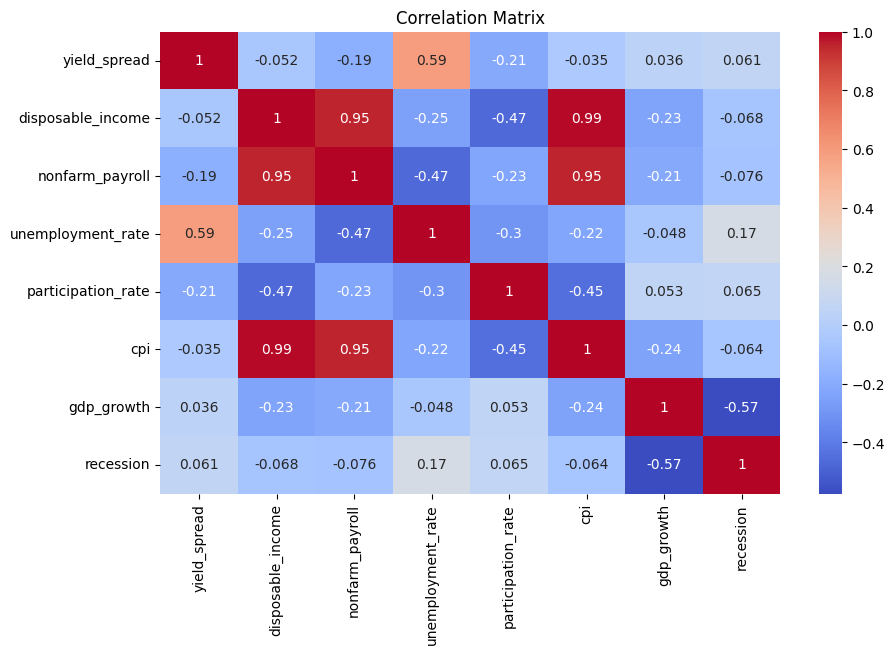

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains the data
indicators = combined_df[['yield_spread','disposable_income', 'nonfarm_payroll', 'unemployment_rate', 'participation_rate', 'cpi', 'gdp_growth','recession']]
correlation_matrix = indicators.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [76]:
print(combined_df.columns)

Index(['date', 'nonfarm_payroll', 'yield_spread', 'gdp_growth',
       'unemployment_rate', 'cpi', 'recession', 'participation_rate',
       'disposable_income', 'recession_flag'],
      dtype='object')


In [77]:
combined_df.isnull().sum()

date                  0
nonfarm_payroll       0
yield_spread          0
gdp_growth            0
unemployment_rate     0
cpi                   0
recession             0
participation_rate    0
disposable_income     0
recession_flag        0
dtype: int64

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



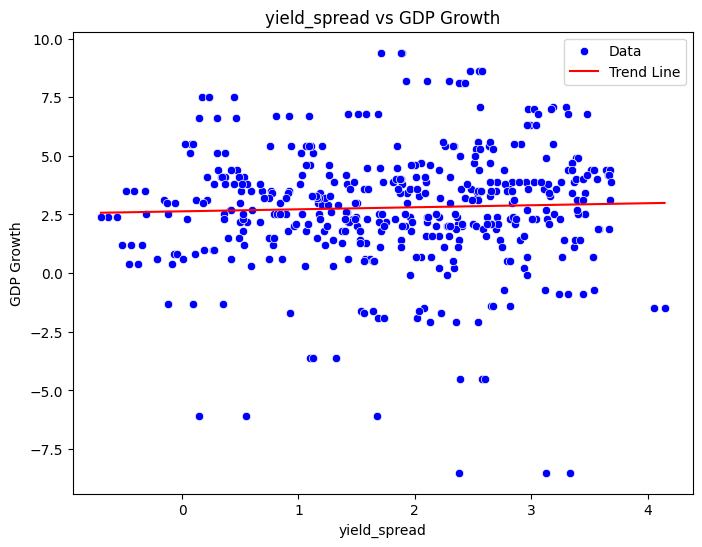

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



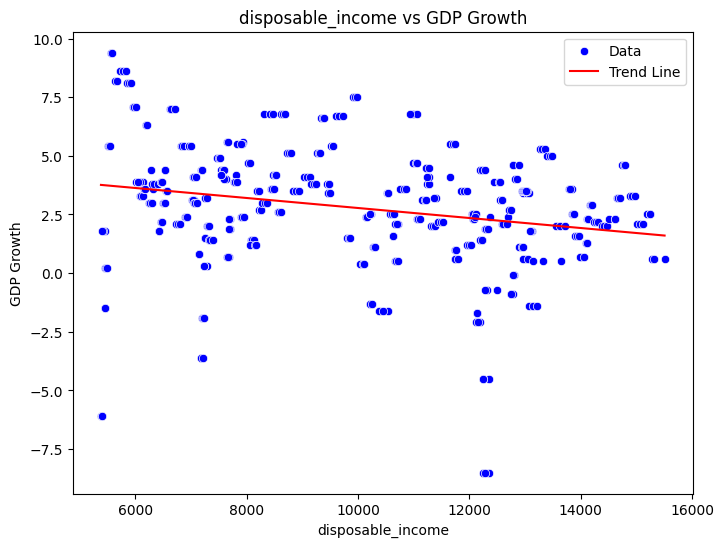

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



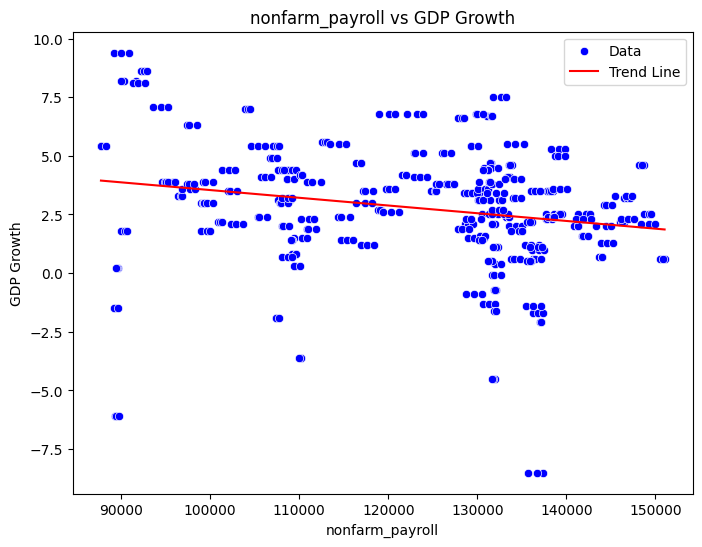

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



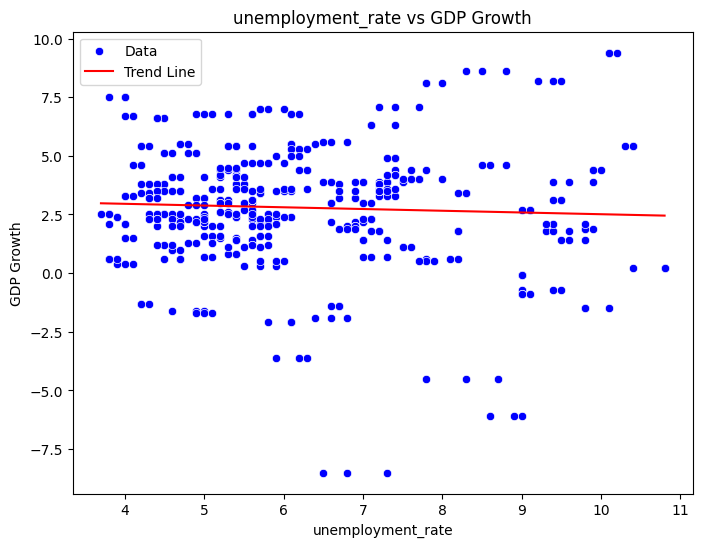

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



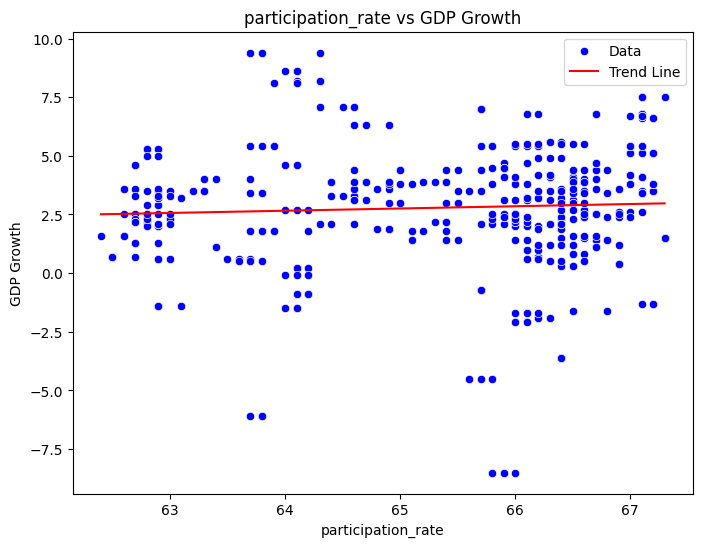

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



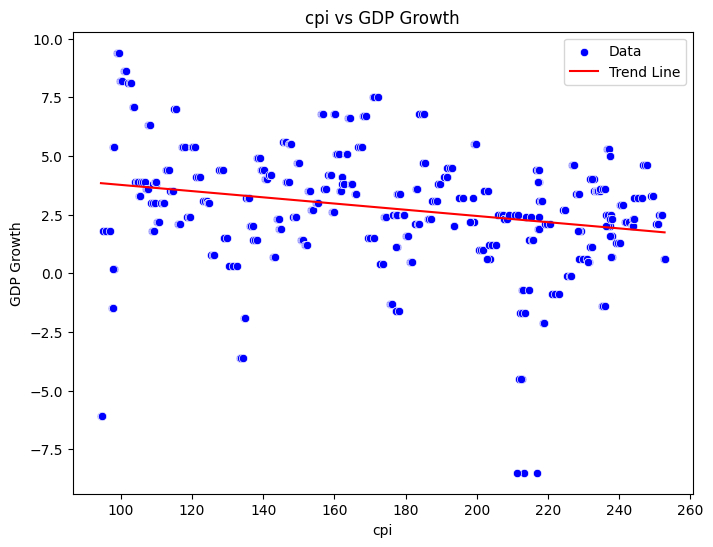

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



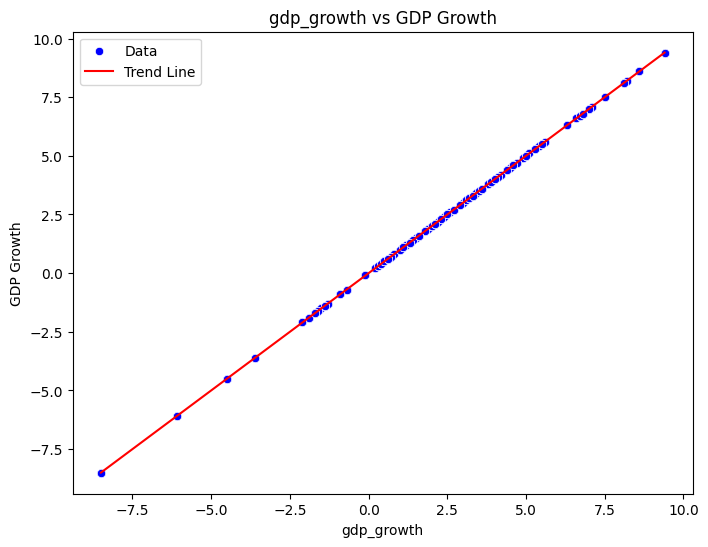

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



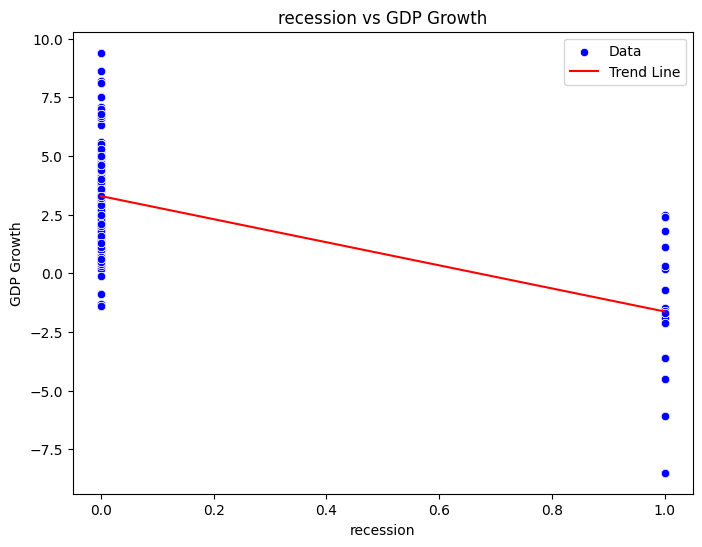

In [78]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# List of indicators to analyze
indicators = ['yield_spread', 'disposable_income', 'nonfarm_payroll', 'unemployment_rate', 'participation_rate', 'cpi', 'gdp_growth', 'recession']

# Scatter plot with trend lines for each indicator vs GDP growth
for indicator in indicators:
    plt.figure(figsize=(8,6))

    # Scatter plot
    sns.scatterplot(x=combined_df[indicator], y=combined_df['gdp_growth'], label='Data', color='blue')

    # Add trend line
    X = combined_df[[indicator]]
    y = combined_df['gdp_growth']

    # Fitting linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Create line for trendline
    X_line = np.linspace(combined_df[indicator].min(), combined_df[indicator].max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)

    plt.plot(X_line, y_line, color='red', label='Trend Line')

    # Title and labels
    plt.title(f'{indicator} vs GDP Growth')
    plt.xlabel(indicator)
    plt.ylabel('GDP Growth')
    plt.legend()

    # Show the plot
    plt.show()

Since no significant relationship is found between these indicators and GDP growth from the scatter plots, it might indicate 2 possible situations:

1. The Lag Effect: 

It’s possible that the effects of the indicators on GDP growth take time to materialize (i.e., lagged effects). You may need to shift the indicators to previous periods (e.g., use last month's or last quarter's values of the indicators) to see their delayed impact on GDP growth.

2. Multivariate Influence: 

Each individual indicator may not explain GDP growth on its own, but collectively, they might have a stronger predictive power. This would suggest that using multivariate models (like multiple linear regression or machine learning models) could capture their combined effects.

### Investigation of the Lag Effects

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



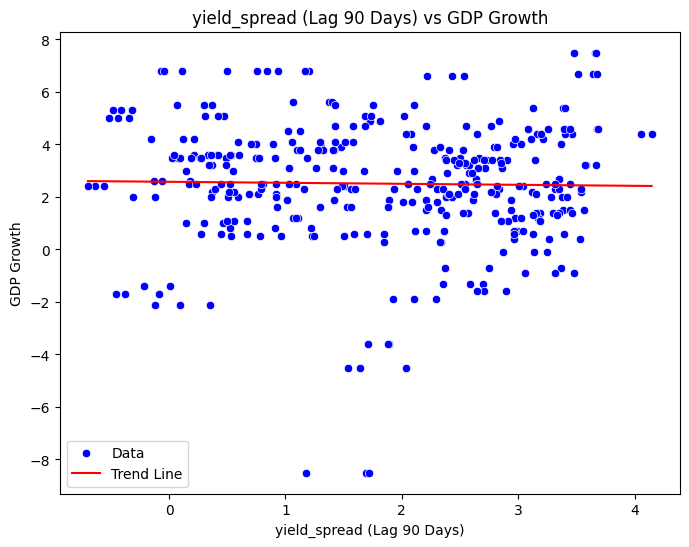

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



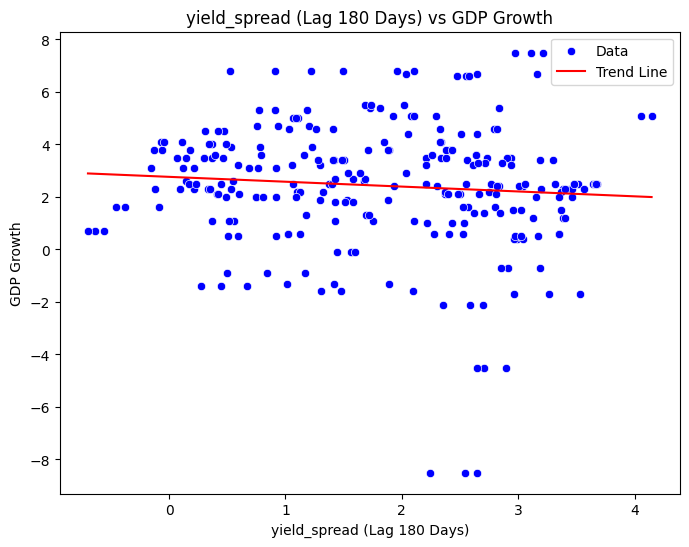

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



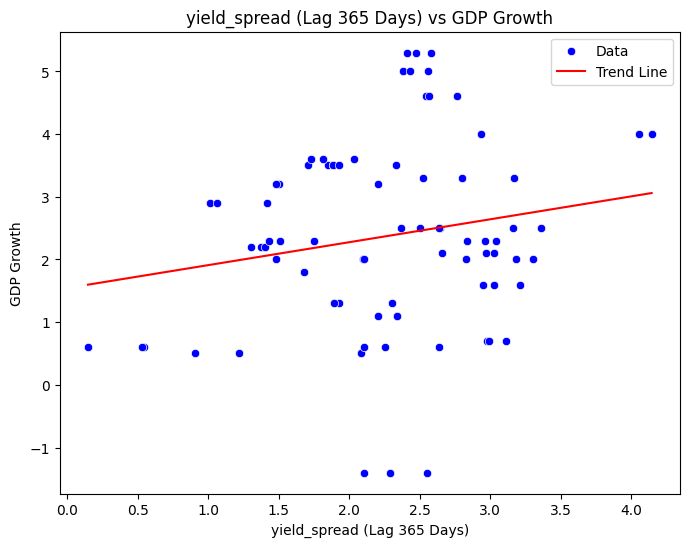

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



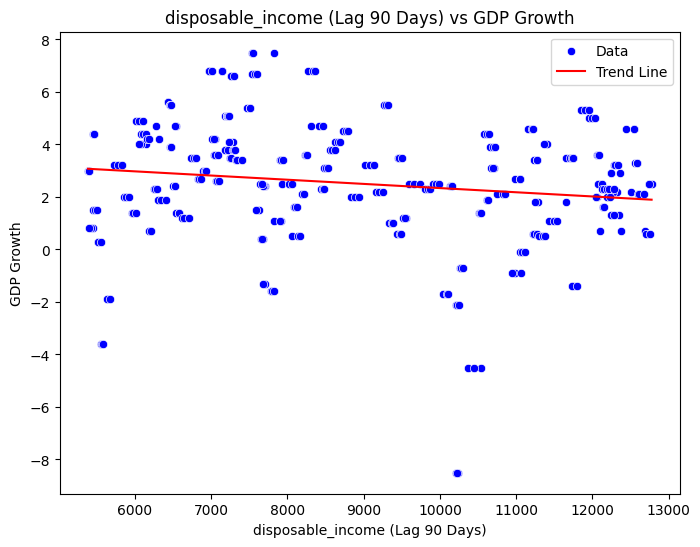

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



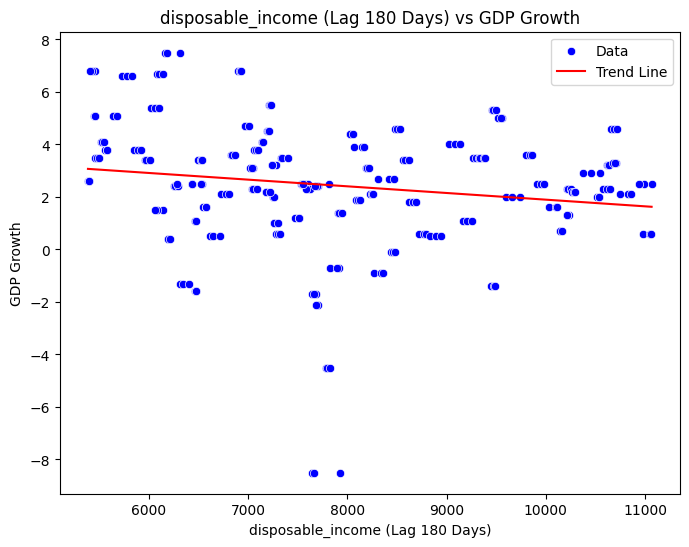

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



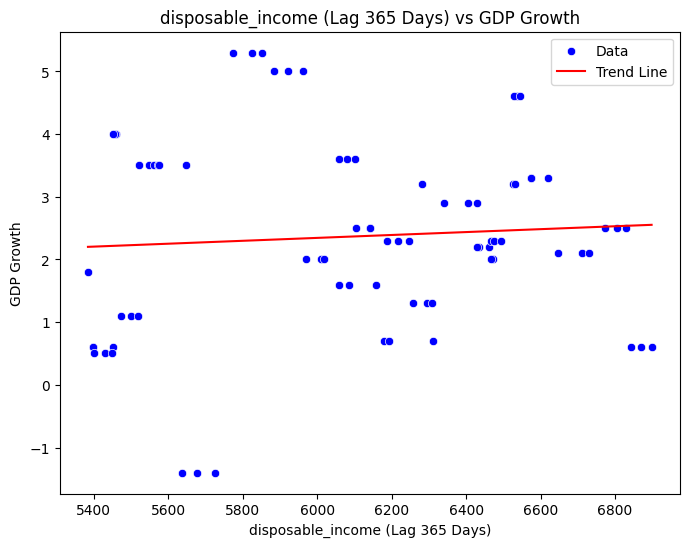

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



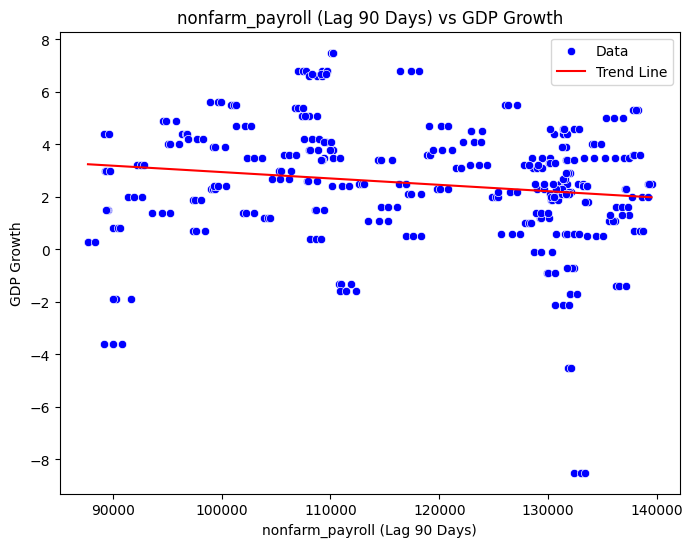

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



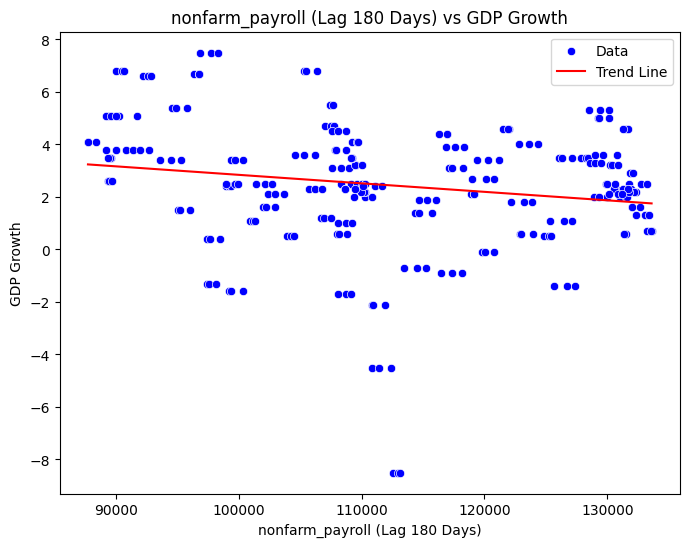

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



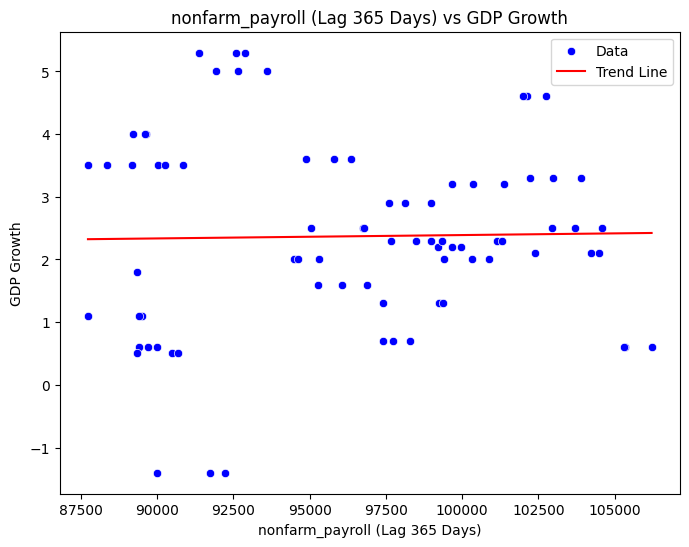

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



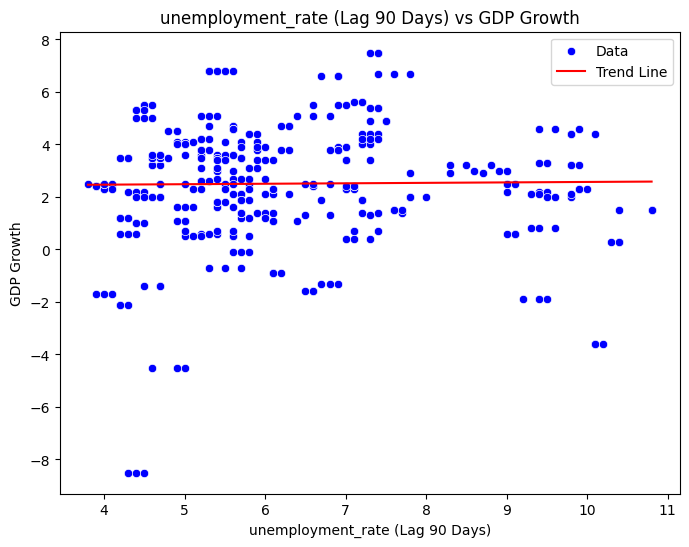

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



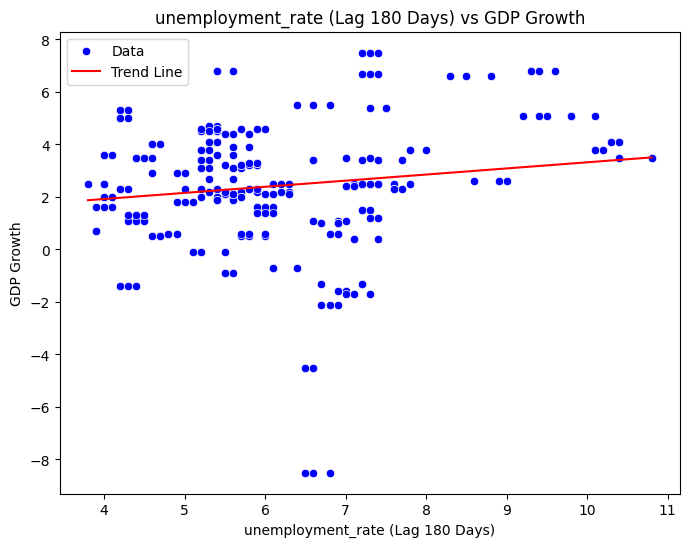

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



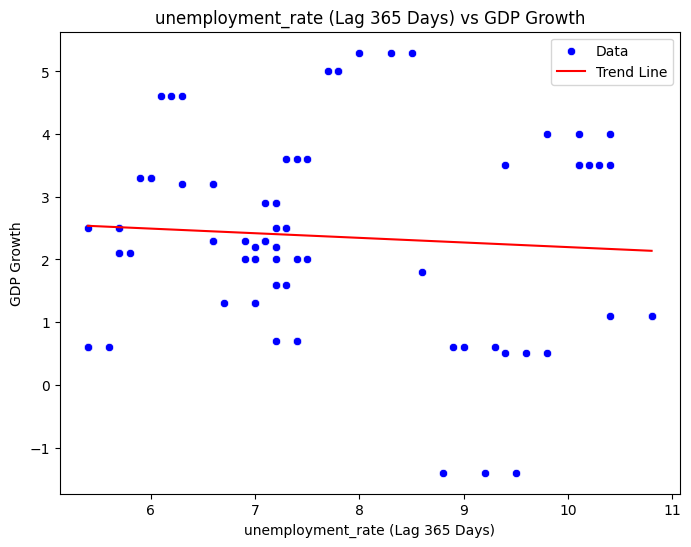

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



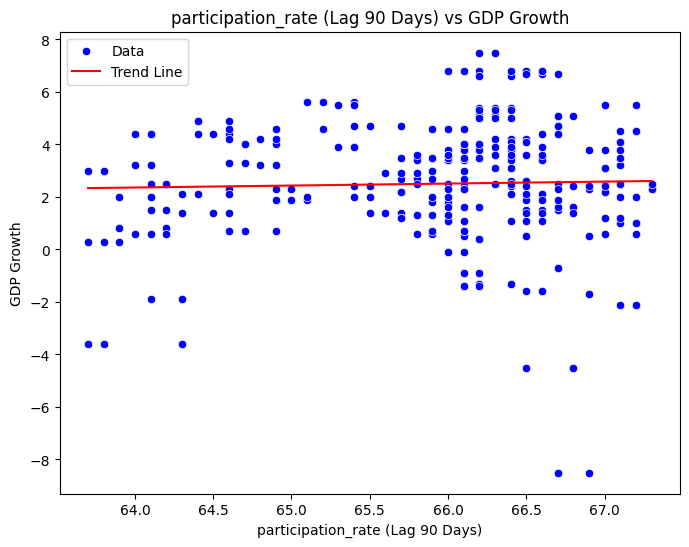

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



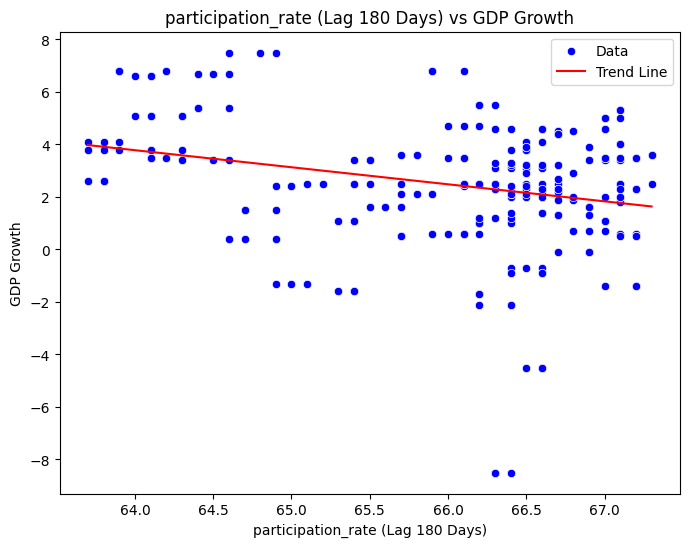

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



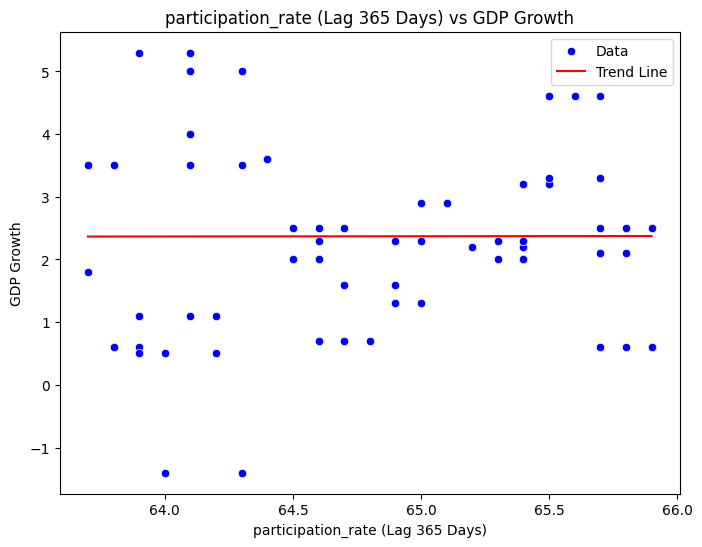

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



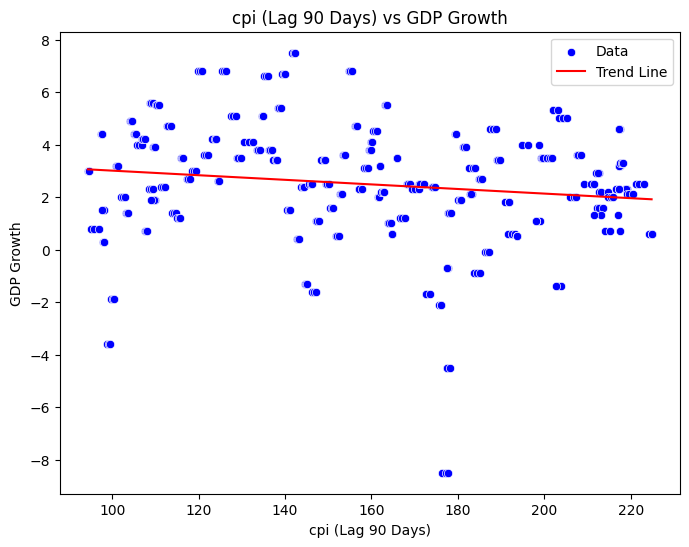

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



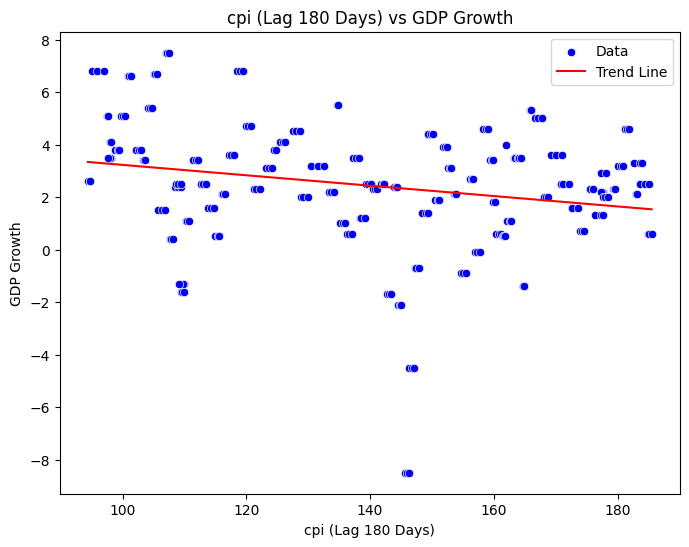

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



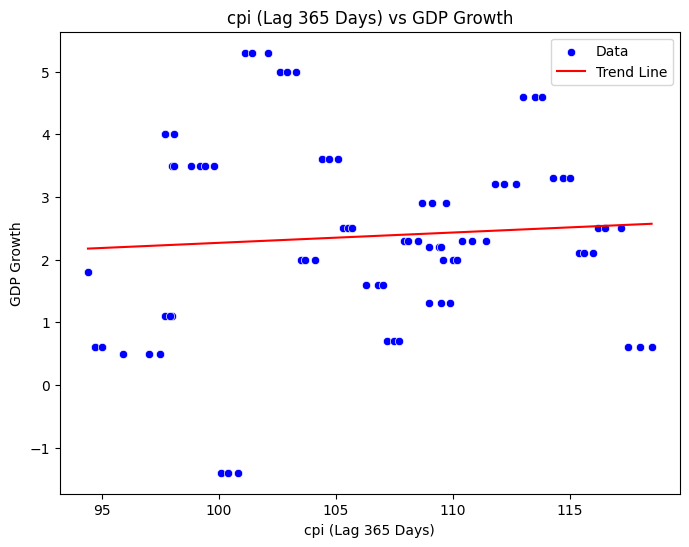

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Ensure 'date' is in datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# List of indicators to analyze
indicators = ['yield_spread', 'disposable_income', 'nonfarm_payroll', 'unemployment_rate', 'participation_rate', 'cpi']

# List of lag periods in days (approx. for 3 months, 6 months, 1 year, 1.5 year and 2 years)
lag_days = [90, 180, 365]  # Lagging by days to approximate months

# Function to shift based on days instead of a fixed period
def create_lagged_features(combined_df, indicator, lag_days):
    combined_df = combined_df.copy()
    lagged_col_name = f'{indicator}_lag_{lag_days}d'
    
    # Shift the values based on the time difference (days)
    combined_df[lagged_col_name] = combined_df[indicator].shift(lag_days)
    return combined_df

# Create lagged variables for each indicator and each lag period (by actual days)
for indicator in indicators:
    for lag in lag_days:
        combined_df = create_lagged_features(combined_df, indicator, lag)

# Now plotting scatter plots for each lagged variable vs GDP growth
for indicator in indicators:
    for lag in lag_days:
        lagged_col_name = f'{indicator}_lag_{lag}d'
        
        # Check if the column exists (in case of missing data due to lagging)
        if lagged_col_name in combined_df.columns:
            plt.figure(figsize=(8, 6))
            
            # Scatter plot
            sns.scatterplot(x=combined_df[lagged_col_name], y=combined_df['gdp_growth'], label='Data', color='blue')
            
            # Add trend line
            X = combined_df[[lagged_col_name]].dropna()  # Drop missing values due to lagging
            y = combined_df['gdp_growth'][X.index]  # Align the GDP growth with the non-NaN lagged data
            
            # Fitting linear regression model
            model = LinearRegression()
            model.fit(X, y)
            
            # Create line for trendline
            X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            y_line = model.predict(X_line)
            
            plt.plot(X_line, y_line, color='red', label='Trend Line')
            
            # Title and labels
            plt.title(f'{indicator} (Lag {lag} Days) vs GDP Growth')
            plt.xlabel(f'{indicator} (Lag {lag} Days)')
            plt.ylabel('GDP Growth')
            plt.legend()
            
            # Show the plot
            plt.show()


For the lag effect, most obvious is lagged gdp effect after yield spread 

In [80]:
import plotly.graph_objects as go

# Create traces for Yield Spread and GDP Growth
fig = go.Figure()

# Yield Spread trace
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['yield_spread'],
                         mode='lines',
                         name='Yield Spread',
                         line=dict(color='orange')))

# GDP Growth trace
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['gdp_growth'],
                         mode='lines',
                         name='GDP Growth (%)',
                         line=dict(color='blue')))

# Add a red line at y=0
fig.add_shape(type="line",
              x0=combined_df.index.min(), x1=combined_df['date'].max(),  # Extend the line across the entire x-axis
              y0=0, y1=0,
              line=dict(color="red", width=2))

# Add titles and labels
fig.update_layout(title='Yield Spread and GDP Growth Over Time',
                  xaxis_title='Date',
                  yaxis_title='Values',
                  legend_title='Indicators')

# Show the interactive plot
fig.show()

### Use Historical Lag analysis for initial estimate

In [81]:
yield_recession_merged_df = yield_spread_df.merge(recession_dates_df, on='date', how='outer')
                           
yield_recession_merged_df['yield_spread'].fillna(method='ffill', inplace=True)
yield_recession_merged_df['recession'].fillna(0, inplace=True)

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\3781207064.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\3781207064.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\3781207064.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will c

In [82]:
# Create a binary column to identify yield curve inversion
yield_recession_merged_df['inversion'] = yield_recession_merged_df ['yield_spread'] < 0
yield_recession_merged_df = yield_recession_merged_df.reset_index()


# Get the dates when the inversion occurred
inversion_dates = yield_recession_merged_df[yield_recession_merged_df ['inversion'] == True]['date'].tolist()

# Display inversion dates
print(inversion_dates)


[Timestamp('1982-02-01 00:00:00'), Timestamp('1982-02-02 00:00:00'), Timestamp('1982-02-08 00:00:00'), Timestamp('1982-02-10 00:00:00'), Timestamp('1982-02-11 00:00:00'), Timestamp('1982-02-16 00:00:00'), Timestamp('1982-02-17 00:00:00'), Timestamp('1982-02-18 00:00:00'), Timestamp('1989-03-27 00:00:00'), Timestamp('1989-05-22 00:00:00'), Timestamp('1989-05-24 00:00:00'), Timestamp('1989-05-25 00:00:00'), Timestamp('1989-05-26 00:00:00'), Timestamp('1989-05-30 00:00:00'), Timestamp('1989-05-31 00:00:00'), Timestamp('1989-06-01 00:00:00'), Timestamp('1989-06-02 00:00:00'), Timestamp('1989-06-05 00:00:00'), Timestamp('1989-06-06 00:00:00'), Timestamp('1989-06-07 00:00:00'), Timestamp('1989-06-08 00:00:00'), Timestamp('1989-06-09 00:00:00'), Timestamp('1989-06-12 00:00:00'), Timestamp('1989-06-13 00:00:00'), Timestamp('1989-06-14 00:00:00'), Timestamp('1989-06-15 00:00:00'), Timestamp('1989-06-16 00:00:00'), Timestamp('1989-06-19 00:00:00'), Timestamp('1989-06-20 00:00:00'), Timestamp('19

### Step 3: Calculate the Lag Between Inversion and Recession
Now that we have the inversion dates, the next step is to calculate the lag between each inversion and the next recession. You can calculate the number of days or months between the inversion and the start of the recession (when USREC == 1).

In [83]:
# Initialize a list to store the lag times
lag_times = []

# Loop over each inversion date and find the next recession start date
for inversion_date in inversion_dates:
    # Get the first recession that occurred after the inversion
    next_recession = yield_recession_merged_df[(yield_recession_merged_df['recession'] == 1) & (yield_recession_merged_df['date'] > inversion_date)]
    
    # Check if any recession occurs after the inversion date
    if not next_recession.empty:
        # Get the first recession start date after the inversion
        first_recession = next_recession.iloc[0]
        
        # Calculate the lag (in months)
        lag_time = (first_recession['date'] - inversion_date).days / 30  # Convert days to months
        lag_times.append(lag_time)
    else:
        # No recession found after this inversion
        print(f"No recession found after inversion on {inversion_date}")

# Display the lag times
print(lag_times)

No recession found after inversion on 2022-10-18 00:00:00
No recession found after inversion on 2022-10-25 00:00:00
No recession found after inversion on 2022-10-26 00:00:00
No recession found after inversion on 2022-10-27 00:00:00
No recession found after inversion on 2022-10-28 00:00:00
No recession found after inversion on 2022-10-31 00:00:00
No recession found after inversion on 2022-11-01 00:00:00
No recession found after inversion on 2022-11-02 00:00:00
No recession found after inversion on 2022-11-03 00:00:00
No recession found after inversion on 2022-11-04 00:00:00
No recession found after inversion on 2022-11-07 00:00:00
No recession found after inversion on 2022-11-08 00:00:00
No recession found after inversion on 2022-11-09 00:00:00
No recession found after inversion on 2022-11-10 00:00:00
No recession found after inversion on 2022-11-14 00:00:00
No recession found after inversion on 2022-11-15 00:00:00
No recession found after inversion on 2022-11-16 00:00:00
No recession f

### Step 4: Analyze Historical Lag
The average lag between the yield curve inversion and the onset of a recession, as well as any other summary statistics you’re interested in.

In [84]:
# Calculate summary statistics
average_lag = np.mean(lag_times)
min_lag = np.min(lag_times)
max_lag = np.max(lag_times)

print(f"Average lag: {average_lag:.2f} months")
print(f"Minimum lag: {min_lag:.2f} months")
print(f"Maximum lag: {max_lag:.2f} months")

Average lag: 9.55 months
Minimum lag: 0.07 months
Maximum lag: 31.13 months


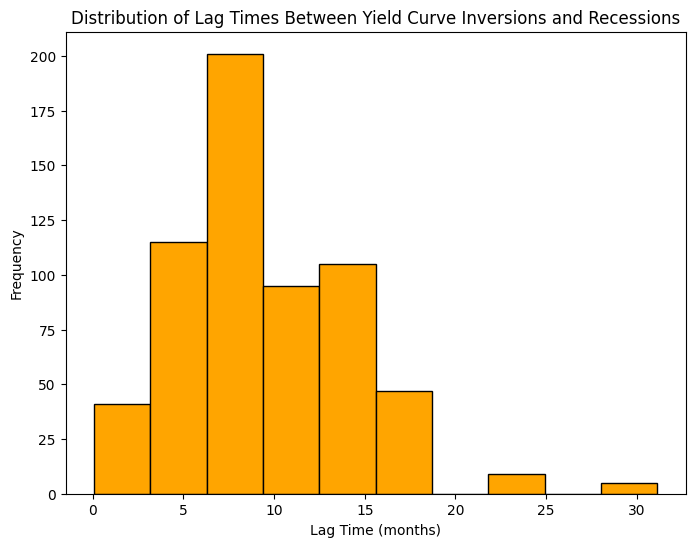

In [85]:
import matplotlib.pyplot as plt

# Plot the distribution of lag times
plt.figure(figsize=(8, 6))
plt.hist(lag_times, bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Lag Times Between Yield Curve Inversions and Recessions')
plt.xlabel('Lag Time (months)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

We find that the lag between the yield curve inversion and the onset of recession are in average 10 months, which approximately complies the result from the scattered plot of yield_spread (Lag 365 Days) vs GDP Growth.

### Use Multiple Linear Regression (MLR) for exploring the linear relation of indicators

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables (X) and dependent variable (y)
X = combined_df[['yield_spread', 'disposable_income', 'nonfarm_payroll', 'unemployment_rate', 'participation_rate', 'cpi']].dropna()
y = combined_df['gdp_growth'].dropna()

# Ensure X and y are aligned after dropping NaNs
X, y = X.align(y, join='inner', axis=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients of the regression
print(f"Coefficients: {lr_model.coef_}")


Mean Squared Error: 4.368650681886202
R-squared: 0.3916052474147924
Coefficients: [ 2.78601403e-01 -9.05180013e-04  2.60345284e-04  3.04490329e-01
 -5.97894303e-01 -5.33363967e-02 -4.95367911e+00]


### Use Random Forest for exploring the more complex relation of indicators

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use the same features as in the linear regression example
X = combined_df[['yield_spread', 'disposable_income', 'nonfarm_payroll', 'unemployment_rate', 'participation_rate', 'cpi']].dropna()
y = combined_df['gdp_growth'].dropna()

# Ensure X and y are aligned after dropping NaNs
X, y = X.align(y, join='inner', axis=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")


Mean Squared Error: 1.9444267528089871
R-squared: 0.7292118048942926
yield_spread: 0.10603120600141669
disposable_income: 0.1222988618005531
nonfarm_payroll: 0.11428595378022788
unemployment_rate: 0.1029409413693385
participation_rate: 0.055915672580944493
cpi: 0.15980045942615415
recession: 0.3387269050413652


### Simple Regression Model for GDP forecast in the Coming Year

To predict GDP growth in the coming year, we use a simple regression model that captures the relationship between yield spread and lagged GDP growth. 


Step 1: Build a Simple Linear Regression Model to Predict Future GDP Based on Yield Spread

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Create Lagged Features

# Create a lagged version of the yield spread based on the average lag time
combined_df['lagged_yield_spread'] = combined_df['yield_spread'].shift(int(average_lag))

# Lag GDP growth by one year (12 months) for autoregressive feature
combined_df['lagged_gdp_growth'] = combined_df['gdp_growth'].shift(12)

# Drop rows with NaN values that resulted from shifting
model_df = combined_df.dropna(subset=['lagged_yield_spread', 'lagged_gdp_growth', 'gdp_growth'])

# Step 2: Split the data into training and testing sets
X = model_df[['lagged_yield_spread', 'lagged_gdp_growth']]  # Features: Lagged Yield Spread and Lagged GDP Growth
y = model_df['gdp_growth']  # Target: GDP Growth

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Check model performance on test set
test_predictions = reg.predict(X_test)

# Display R-squared score on test set
r_squared = reg.score(X_test, y_test)
print(f'R-squared on test set: {r_squared:.4f}')


R-squared on test set: -0.1530


In [89]:
# Step 4: Predict GDP Growth for the next year (12 months)

# Use the most recent lagged features for prediction
latest_data = combined_df.iloc[-1]  # Get the most recent data row

# Prepare the input for prediction (lagged yield spread and lagged GDP growth)
input_data = np.array([[latest_data['lagged_yield_spread'], latest_data['lagged_gdp_growth']]])

# Predict GDP growth for the next month
predicted_gdp_growth_next_month = reg.predict(input_data)[0]

print(f'Predicted GDP Growth for next month: {predicted_gdp_growth_next_month:.2f}%')

# Extend the forecast to the coming year (12 months)
forecast = []
for i in range(12):
    forecast.append(predicted_gdp_growth_next_month)
    # Update input data with the predicted value (simulating autoregressive behavior)
    input_data[0, 1] = predicted_gdp_growth_next_month  # Replace lagged GDP growth with the predicted value
    predicted_gdp_growth_next_month = reg.predict(input_data)[0]

# Display the forecast for the next 12 months
print(f'Forecasted GDP Growth for the next 12 months: {forecast}')


Predicted GDP Growth for next month: 2.96%
Forecasted GDP Growth for the next 12 months: [2.9638403593605127, 2.7687651034054483, 2.7455067644630082, 2.742733730396166, 2.7424031084220473, 2.7423636891840806, 2.742358989326106, 2.742358428973696, 2.7423583621642678, 2.7423583541987453, 2.7423583532490357, 2.7423583531358044]


c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\2992913274.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



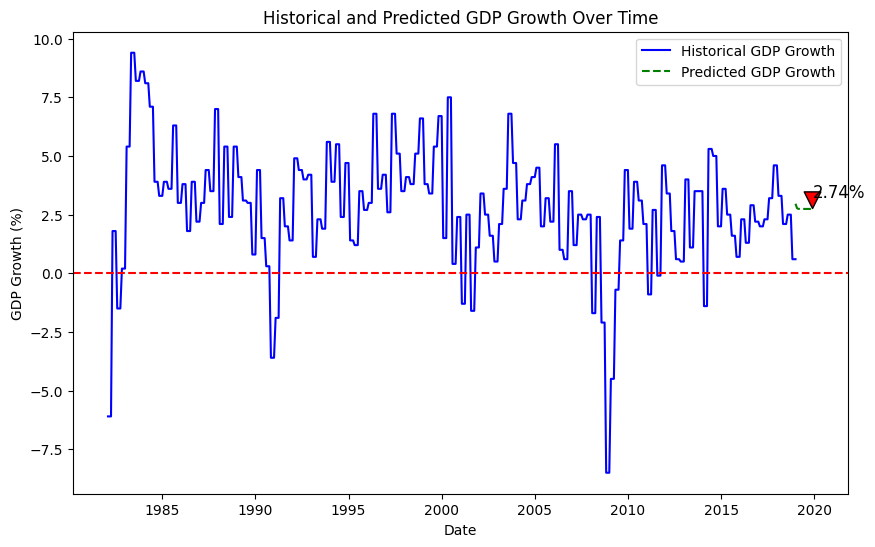

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming the forecast and combined_df are already defined and forecast is for the next 12 months
# Let's generate dates for the next 12 months based on the last date in combined_df

# Step 1: Create future dates
last_date = combined_df['date'].max()
future_dates = pd.date_range(last_date, periods=12, freq='M')  # Generate the next 12 months

# Step 2: Plot the historical GDP Growth data
plt.figure(figsize=(10, 6))

# Plot historical GDP Growth
plt.plot(combined_df['date'], combined_df['gdp_growth'], label='Historical GDP Growth', color='blue')

# Plot the predicted GDP Growth for the next year
plt.plot(future_dates, forecast, label='Predicted GDP Growth', color='green', linestyle='--')

# Step 3: Add an arrow for the last prediction value
plt.annotate(f'{forecast[-1]:.2f}%', xy=(future_dates[-1], forecast[-1]), 
             xytext=(future_dates[-1], forecast[-1] + 0.5), 
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

# Step 4: Customize the plot
plt.title('Historical and Predicted GDP Growth Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth (%)')
plt.axhline(y=0, color='red', linestyle='--')  # Add a red line at y=0 for reference
plt.legend()

# Show the plot
plt.show()


In [91]:
print(combined_df.head())

        date  nonfarm_payroll  yield_spread  gdp_growth  unemployment_rate  \
0 1982-01-31          89328.0      1.676000        -6.1                8.6   
1 1982-02-28          89417.0      0.146111        -6.1                8.9   
2 1982-03-31          89710.0      0.546522        -6.1                9.0   
3 1982-04-30          89993.0      0.527143         1.8                9.3   
4 1982-05-31          90478.0      0.908500         1.8                9.4   

    cpi  recession  participation_rate  disposable_income  recession_flag  \
0  94.4        1.0                63.7             5384.7               1   
1  94.7        1.0                63.8             5399.5               1   
2  94.7        1.0                63.8             5398.9               1   
3  95.0        1.0                63.9             5452.7               1   
4  95.9        1.0                64.2             5430.3               1   

   ...  unemployment_rate_lag_180d  unemployment_rate_lag_365d  \
0 

In [92]:
# Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 1.2: Create lag features
average_lag = np.mean(lag_times)  # Use your calculated average lag from previous steps

# Create lagged versions of the predictors (shifted by average lag in months)
combined_df['lagged_yield_spread'] = combined_df['yield_spread'].shift(int(average_lag))
combined_df['lagged_gdp_growth'] = combined_df['gdp_growth'].shift(12)  # Lagged by 1 year

# Drop rows with NaN values that resulted from shifting
combined_df = combined_df.dropna()

# Step 1.3: Define features and target variable
features = ['nonfarm_payroll', 'yield_spread', 'gdp_growth', 'unemployment_rate', 'cpi' , 'lagged_yield_spread', 'lagged_gdp_growth']
X = combined_df[features]  # Predictor variables
y = combined_df['gdp_growth']  # Target variable

# Step 1.4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [93]:
# Step 2: Train the Random Forest Model

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Step 2.1: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 2.2: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.01
R-squared Score: 0.99


In [94]:
# Step 3: Forecast GDP Growth for the Next 12 Months

# Use the most recent data as input for prediction
latest_data = combined_df.iloc[-1][features].values.reshape(1, -1)

# Initialize a list to store predictions for the next 12 months
future_predictions = []

for i in range(12):
    # Predict GDP growth for the next month
    predicted_gdp_growth = rf.predict(latest_data)[0]
    future_predictions.append(predicted_gdp_growth)
    
    # Update the input data for the next month (shift features for autoregression)
    latest_data[0][-1] = predicted_gdp_growth  # Update lagged_gdp_growth with the predicted value

# Print the predictions for the next 12 months
print(f"Predicted GDP Growth for the next 12 months: {future_predictions}")


Predicted GDP Growth for the next 12 months: [0.6750000000000004, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006]


c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\aps20\OneDrive\Deskto

C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\4025490632.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



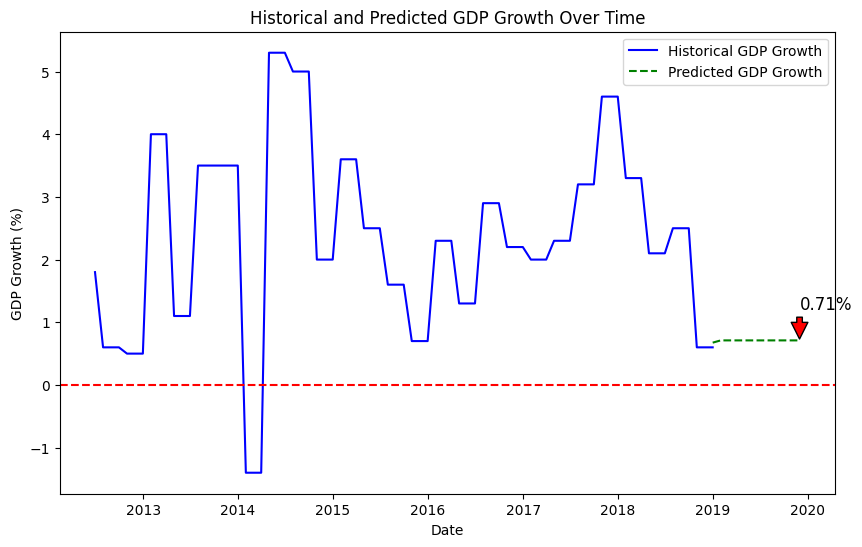

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the combined_df and random forest model (rf) are already defined
# and future_predictions contains the predictions for the next 12 months

# Step 1: Create future dates for the next 12 months
future_dates = pd.date_range(combined_df['date'].max(), periods=12, freq='M')

# Plot the historical GDP Growth
plt.figure(figsize=(10, 6))
plt.plot(combined_df['date'], combined_df['gdp_growth'], label='Historical GDP Growth', color='blue')

# Plot the predicted GDP Growth for the next 12 months
plt.plot(future_dates, future_predictions, label='Predicted GDP Growth', color='green', linestyle='--')

# Step 2: Add an arrow for the final predicted value
plt.annotate(f'{future_predictions[-1]:.2f}%', xy=(future_dates[-1], future_predictions[-1]), 
             xytext=(future_dates[-1], future_predictions[-1] + 0.5), 
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

# Step 3: Customize the plot
plt.title('Historical and Predicted GDP Growth Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth (%)')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.legend()

# Show the plot
plt.show()


In [96]:
combined_df.head(1)

,date,nonfarm_payroll,yield_spread,gdp_growth,unemployment_rate,cpi,recession,participation_rate,disposable_income,recession_flag,...,unemployment_rate_lag_180d,unemployment_rate_lag_365d,participation_rate_lag_90d,participation_rate_lag_180d,participation_rate_lag_365d,cpi_lag_90d,cpi_lag_180d,cpi_lag_365d,lagged_yield_spread,lagged_gdp_growth
365,2012-06-30,134986.0,1.530952,1.8,8.2,228.524,0.0,63.8,13097.2,0,...,5.0,8.6,65.9,67.1,63.7,191.7,160.2,94.4,1.961429,2.7


In [97]:
import statsmodels.api as sm

# Step 1.1: Prepare data for Probit model (recession as target)
# Recession target is binary, use 'USREC' as the recession indicator (1 for recession, 0 for no recession)
combined_df['recession'] = combined_df['recession'].astype(int)

# Step 1.2: Define features for the Probit model
probit_features = ['nonfarm_payroll', 'unemployment_rate', 'cpi', 'yield_spread']
X_probit = combined_df[probit_features]
y_probit = combined_df['recession']

# Add a constant term for the Probit model (required for statsmodels)
X_probit = sm.add_constant(X_probit)

# Step 1.3: Train the Probit model
probit_model = sm.Probit(y_probit, X_probit)
probit_result = probit_model.fit()

# Display summary of the Probit model
print(probit_result.summary())

# Step 1.4: Predict the probability of a recession
combined_df['recession_probability'] = probit_result.predict(X_probit)

# Display the predicted recession probabilities
print(combined_df[['date', 'recession_probability']].tail())


         Current function value: 0.000000
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:              recession   No. Observations:                   79
Model:                         Probit   Df Residuals:                       74
Method:                           MLE   Df Model:                            4
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                     inf
Time:                        12:20:25   Log-Likelihood:            -4.4409e-16
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5202   5.17e+08  -1.07e-08      1.000   -1.01e+09    1.01e+09
nonfarm_payroll   -4.051e-05   2741.006  -1.

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\aps20\OneDrive\Desktop\DA_test\myenv1\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separati

In [98]:
# Step 2.1: Forecast GDP Growth using Random Forest (already completed in previous steps)
# Assuming 'future_predictions' contains the predicted GDP growth for the next 12 months

# Step 2.2: Adjust GDP Growth Prediction based on the recession probability
# Let's use the latest predicted recession probability to adjust the GDP growth forecast
# A higher recession probability will reduce the GDP growth prediction

# Define the weight for recession impact (you can adjust this based on experimentation)
recession_weight = 0.5

# Apply the blending (scaling the predicted GDP growth down when recession probability is high)
combined_df['blended_gdp_forecast'] = (1 - combined_df['recession_probability'] * recession_weight) * combined_df['gdp_growth']

# Step 2.3: For the future predictions, use the last known recession probability to adjust
latest_recession_prob = combined_df['recession_probability'].iloc[-1]
adjusted_future_predictions = [(1 - latest_recession_prob * recession_weight) * pred for pred in future_predictions]

# Display the adjusted predictions for the next year
print(f"Adjusted GDP Growth predictions for the next 12 months: {adjusted_future_predictions}")


Adjusted GDP Growth predictions for the next 12 months: [0.6750000000000004, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006, 0.7110000000000006]


C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\416261979.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



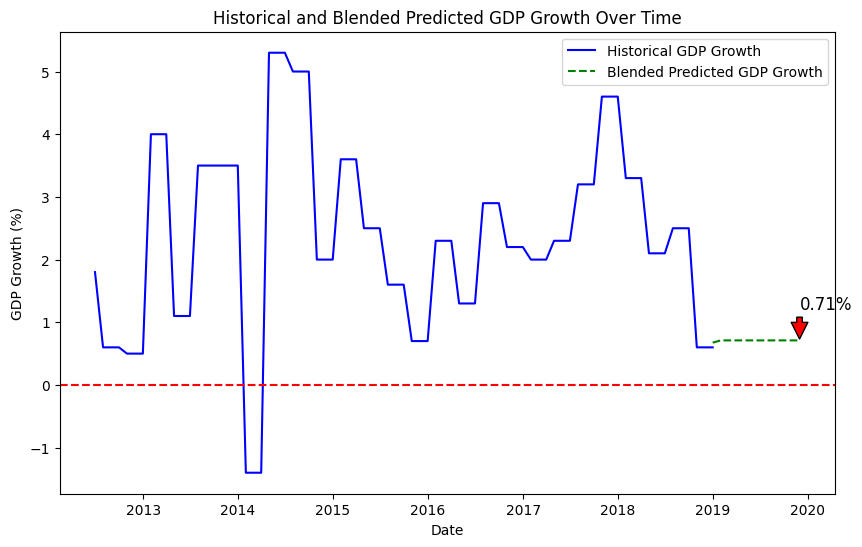

In [99]:
# Step 3: Plot the historical and blended forecast of GDP growth

# Create future dates for the next 12 months
future_dates = pd.date_range(combined_df['date'].max(), periods=12, freq='M')

# Plot the historical GDP Growth
plt.figure(figsize=(10, 6))
plt.plot(combined_df['date'], combined_df['gdp_growth'], label='Historical GDP Growth', color='blue')

# Plot the predicted GDP Growth for the next 12 months (blended)
plt.plot(future_dates, adjusted_future_predictions, label='Blended Predicted GDP Growth', color='green', linestyle='--')

# Add an arrow for the final blended prediction value
plt.annotate(f'{adjusted_future_predictions[-1]:.2f}%', xy=(future_dates[-1], adjusted_future_predictions[-1]), 
             xytext=(future_dates[-1], adjusted_future_predictions[-1] + 0.5), 
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

# Customize the plot
plt.title('Historical and Blended Predicted GDP Growth Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth (%)')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()

# Show the plot
plt.show()


C:\Users\aps20\AppData\Local\Temp\ipykernel_20144\3320814203.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



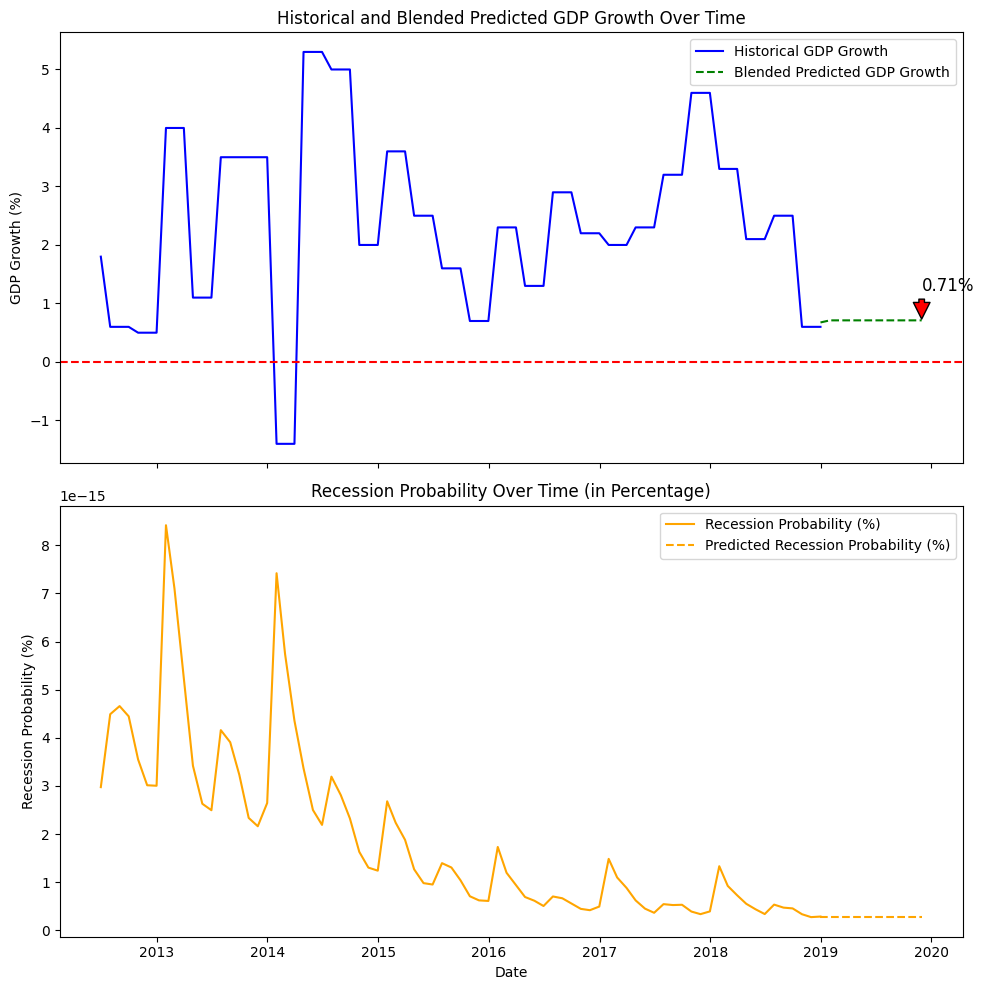

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create future dates for the next 12 months
future_dates = pd.date_range(combined_df['date'].max(), periods=12, freq='M')

# Step 2: Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Step 3: Plot historical and blended GDP growth on the first axis (ax1)

# Plot the historical GDP Growth
ax1.plot(combined_df['date'], combined_df['gdp_growth'], label='Historical GDP Growth', color='blue')

# Plot the blended predicted GDP Growth for the next 12 months
ax1.plot(future_dates, adjusted_future_predictions, label='Blended Predicted GDP Growth', color='green', linestyle='--')

# Add an arrow for the final blended prediction value
ax1.annotate(f'{adjusted_future_predictions[-1]:.2f}%', xy=(future_dates[-1], adjusted_future_predictions[-1]), 
             xytext=(future_dates[-1], adjusted_future_predictions[-1] + 0.5), 
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

# Customize the first subplot
ax1.set_title('Historical and Blended Predicted GDP Growth Over Time')
ax1.set_ylabel('GDP Growth (%)')
ax1.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
ax1.legend()

# Step 4: Plot the recession probability on the second axis (ax2), converting to percentage

# Convert recession probability to percentage
combined_df['recession_probability_percentage'] = combined_df['recession_probability'] * 100
latest_recession_prob_percentage = latest_recession_prob * 100

# Plot the recession probability (in percentage) over time
ax2.plot(combined_df['date'], combined_df['recession_probability_percentage'], label='Recession Probability (%)', color='orange')

# Highlight the latest recession probability in the future (also in percentage)
ax2.plot(future_dates, [latest_recession_prob_percentage] * 12, label='Predicted Recession Probability (%)', color='orange', linestyle='--')

# Customize the second subplot
ax2.set_title('Recession Probability Over Time (in Percentage)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Recession Probability (%)')
ax2.legend()

# Step 5: Show the plots
plt.tight_layout()
plt.show()
